# Loss en Python  

Importando el paquete $pytorch$ y llamandolo como `pt`:  

In [1]:
import torch as pt

## 1.Creando la funcción que cree los datos iniciales:

Creando la función que se aproxime a:  $f(x)= -3x +1$ 

In [2]:
from torch.utils.data import Dataset

In [3]:
class Data(Dataset):
    def __init__(self):
        self.x=pt.arange(-3,3,0.1).view(-1,1)
        self.y=-3*self.x + 1+ 0.45*pt.randn(self.x.size())
        self.len= self.x.shape[0]
                
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len

Guardando los datos en la variable `dataset`:

In [4]:
dataset=Data()

## 2.Creando el programa  de la función lineal $Loss$:

   **¡¡¡¡MUCHA ATENCIÓN!!!**

In [5]:
import torch.nn as nn

In [6]:
class LR(nn.Module):
    def __init__(self,in_size,out_size):
        super(LR,self).__init__()
        self.linear=nn.Linear(in_size,out_size)
        
    def forward(self,x):
        out= self.linear(x)
        return out

Definiendo la **función objetivo**: $$ \Large g(y^*,y)= \frac{1}{N}\sum_{n=1}^N (y^*-y)^2 $$

In [7]:
def criterion(yhat,y):
    return pt.mean((yhat-y)**2)

**Otra alternativa:**<br> `criterion=nn.MSELoss()`

Particionando el dataset con el tamaño de una fila:

In [8]:
from torch.utils.data import DataLoader

In [9]:
trainloader= DataLoader(dataset=dataset,batch_size=1)

Defininendo `model` e indicando que el input y el output son unidimensionales

In [10]:
model=LR(1,1)

Añadiendo el modelo a la función `optim.SDG` con lr=0.01:

In [11]:
optimizer=pt.optim.SGD(model.parameters(),lr=0.01)

Ejecutando la serie de bucles:

In [12]:
for epoch in range(10):
    for x,y in trainloader:
        yhat= model(x)
        loss= criterion(yhat,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()        

Quiero saber la precisión del modelo creado:

In [13]:
loss

tensor(0.0482, grad_fn=<MeanBackward1>)

Chequeando los resultados mediante el gráfico:

In [14]:
import matplotlib.pyplot as plt

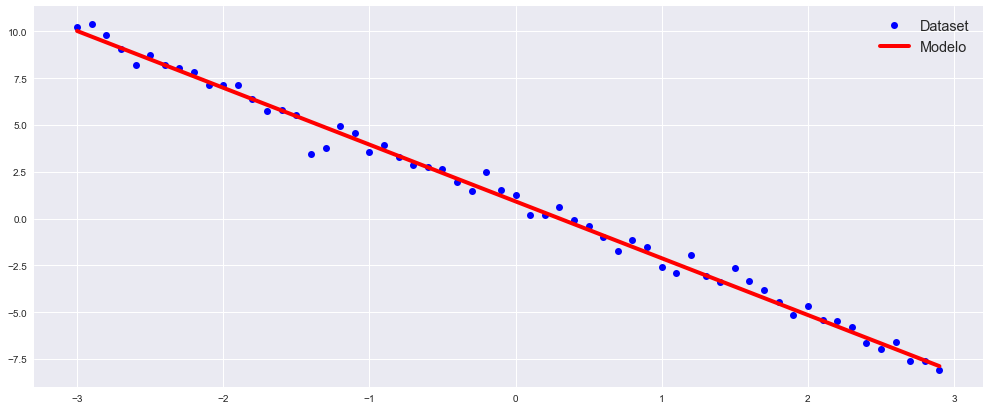

In [15]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize= (17,7))
ax.plot(dataset.x.numpy(),dataset.y.numpy(),'bo', color= 'blue', label='Dataset')
ax.plot(dataset.x.numpy(),model(dataset.x).detach().numpy(),linewidth=4,color= 'red',label='Modelo')
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
#legend.get_frame().set_facecolor('cyan')
plt.show()

In [16]:
list(model.parameters())

[Parameter containing:
 tensor([[-3.0343]], requires_grad=True), Parameter containing:
 tensor([0.9139], requires_grad=True)]